Let me start by implementing the simply tree search that i already have in fortran

In [1]:
import numpy as np
from environment_2048 import env_2048
from IPython.display import clear_output
import random
from matplotlib import pylab as plt
import operator

In [4]:
def simulation(env, state):
    board=np.copy(state) 
    moves=True
    score=0
    i=0
    while moves:
        i+=1
        am=env.available_moves(board)
        moves=not all(am==-1)
        if not moves:
            break
        rnd_move=np.random.choice(am)
        board, score=env.step(board, rnd_move, score)
    return board, score
    

# Graphics interface

In [2]:
def render(board,paso, title = 'Current game'):
        """ Draws a colored game board """
        cell_colors = {
            0: '#FFFFFF',
            2: '#EEE4DA',
            4: '#ECE0C8',
            8: '#ECB280',
            16:'#EC8D53',
            32:'#F57C5F',
            64:'#E95937',
            128:'#F3D96B',
            256:'#F2D04A',
            512:'#E5BF2E',
            1024:'#E2B814',
            2048:'#EBC502',
            4096:'#00A2D8',
            8192:'#9ED682',
            16384:'#9ED682',
            32768:'#9ED682',
            65536:'#9ED682',
            131072:'#9ED682',
        }
        
        ncols = 4
        nrows = 4

        # create the plots
        fig = plt.figure(figsize=(7,7))
        plt.suptitle(title)
        axes = [ fig.add_subplot(nrows, ncols, r * ncols + c) for r in range(0, nrows) for c in range(1, ncols+1) ]

        # add some data
        v = np.reshape(board, -1)
        for i, ax in enumerate(axes):
            ax.text(0.5, 0.5, str(int(v[i])), horizontalalignment='center', verticalalignment='center')
            ax.set_facecolor(cell_colors[int(v[i])])

        # remove the x and y ticks
        for ax in axes:
            ax.set_xticks([])
            ax.set_yticks([])

        plt.show()
        plt.close()
        
def render_save(board,paso, title = 'Current game'):
        """ Draws a colored game board """
        cell_colors = {
            0: '#FFFFFF',
            2: '#EEE4DA',
            4: '#ECE0C8',
            8: '#ECB280',
            16:'#EC8D53',
            32:'#F57C5F',
            64:'#E95937',
            128:'#F3D96B',
            256:'#F2D04A',
            512:'#E5BF2E',
            1024:'#E2B814',
            2048:'#EBC502',
            4096:'#00A2D8',
            8192:'#9ED682',
            16384:'#9ED682',
            32768:'#9ED682',
            65536:'#9ED682',
            131072:'#9ED682',
        }
        
        ncols = 4
        nrows = 4

        # create the plots
        fig = plt.figure(figsize=(7,7))
        plt.suptitle(title)
        axes = [ fig.add_subplot(nrows, ncols, r * ncols + c) for r in range(0, nrows) for c in range(1, ncols+1) ]

        # add some data
        v = np.reshape(board, -1)
        for i, ax in enumerate(axes):
            ax.text(0.5, 0.5, str(int(v[i])), horizontalalignment='center', verticalalignment='center')
            ax.set_facecolor(cell_colors[int(v[i])])

        # remove the x and y ticks
        for ax in axes:
            ax.set_xticks([])
            ax.set_yticks([])

        plt.savefig('animations/frame_'+str(paso)+'.jpg')
        plt.close()

In [3]:
%%time
#!rm animations/*.jpg
# commands 0:up, 1:right, 2:down, 3:left or Clockwise
env=env_2048()
sta1=env.reset()

sta_final, score_final=simulation(env, sta1)
print(sta_final)
print("score"+str(score_final))

NameError: name 'simulation' is not defined

In [6]:
def mc_tree(env, state, searches_per_move, simulation_lenght):
    average_score=np.zeros(4)
    for i in range(4): # Prove the four actions for a unique initial state
        mean=0
        for j in range(2,searches_per_move):
            board=np.copy(state) 
            score=0
            board, score=env.step(board,i,score)
            availabe_moves=env.available_moves(board)
            moves=not all(availabe_moves==-1)
            #if len()==0:
            if not moves:
                score = score/(simulation_lenght/2)
                break
            for l in range(2,simulation_lenght):
                availabe_moves=env.available_moves(board)
                moves=not all(availabe_moves==-1)
               # if len(availabe_moves)==0:
                if not moves:
                    score =  score*(min(l,simulation_lenght/2))/(simulation_lenght/2)
                    break
                action=random.choice(availabe_moves)
                board, score=env.step(board,action,score)
                dscore=0
                board, dscore=env.step(board,action,score)# same action twice, and record both scores
            mean=mean+(score-mean)/j
            
        average_score[i]=mean
    return average_score
        

In [12]:
%%time
#!rm animations/*.jpg
# up = 1, left = 2, down = 3, right = 4 default is up
env=env_2048()
state=env.reset()
#am=env.available_moves(state)
i=0
score=0
moves=True
#rep = deque(maxlen=3)
best_possible=True
depth =15
ntry =300
while moves:
    i+=1
    am=env.available_moves(state)
    moves=not all(am==-1)
    if not moves:
        print("Game finished")
        break
    moves_prob=mc_tree(env, state,ntry,depth)
    #print("The average scores at step %s are %s" %(i, moves_prob))
    greedy_move=np.argmax(moves_prob)
    max_score=np.max(moves_prob)

    # It might happend that at some point later in the game, the best move from the tree search 
    # is not possible anymore (not available), so we might need to choose an action randomly 
    if greedy_move in am:
        best_possible=True
    else:
        best_possible=False
    if best_possible:
        greedy_move=greedy_move
    else:
        greedy_move=np.random.choice(am)
        
    state, score=env.step(state, greedy_move, score)

    print("max tile= %s" %(np.amax(state)) )
    #render_save(state,i)
    #render(state,i)
    print(state)
    clear_output(wait=True)
print(state)

Game finished
[[   4    2  512    2]
 [   2  128   32   16]
 [   8 2048   64 1024]
 [  64    2   32    8]]
CPU times: user 1h 5min 21s, sys: 52.9 s, total: 1h 6min 14s
Wall time: 1h 5min 35s


<font color='#E95937'><font size=6.5> Using fortran environment for speed reasons </font>

In [135]:
import numpy as np
from IPython.display import clear_output
import random
from matplotlib import pylab as plt
import operator
import environment_2048_fortran
from collections import defaultdict, deque

In [136]:
pwd

'/Users/carloscardona/Dropbox (ASU)/Data_analysis_and_ML/carlos-cardona_com/2048/2048_python'

In [137]:
print(environment_2048_fortran.__doc__)

This module 'environment_2048_fortran' is auto-generated with f2py (version:2).
Functions:
  add2(m)
  merge(m,action,score)
  tm = available_moves(m)
  mat = reset()
  score_out,nmat = step(mat,act,score)
  bm = mc_tree(mat,searches_per_move,simulation_lenght)
.


In [138]:
def render(board,paso, title = 'Current game'):
        """ Draws a colored game board """
        cell_colors = {
            0: '#FFFFFF',
            2: '#EEE4DA',
            4: '#ECE0C8',
            8: '#ECB280',
            16:'#EC8D53',
            32:'#F57C5F',
            64:'#E95937',
            128:'#F3D96B',
            256:'#F2D04A',
            512:'#E5BF2E',
            1024:'#E2B814',
            2048:'#EBC502',
            4096:'#00A2D8',
            8192:'#9ED682',
            16384:'#9ED682',
            32768:'#9ED682',
            65536:'#9ED682',
            131072:'#9ED682',
        }
        
        ncols = 4
        nrows = 4

        # create the plots
        fig = plt.figure(figsize=(7,7))
        plt.suptitle(title)
        axes = [ fig.add_subplot(nrows, ncols, r * ncols + c) for r in range(0, nrows) for c in range(1, ncols+1) ]

        # add some data
        v = np.reshape(board, -1)
        for i, ax in enumerate(axes):
            ax.text(0.5, 0.5, str(int(v[i])), horizontalalignment='center', verticalalignment='center')
            ax.set_facecolor(cell_colors[int(v[i])])

        # remove the x and y ticks
        for ax in axes:
            ax.set_xticks([])
            ax.set_yticks([])

        plt.show()
        plt.close()
        
def render_save(board,paso, title = 'Current game'):
        """ Draws a colored game board """
        cell_colors = {
            0: '#FFFFFF',
            2: '#EEE4DA',
            4: '#ECE0C8',
            8: '#ECB280',
            16:'#EC8D53',
            32:'#F57C5F',
            64:'#E95937',
            128:'#F3D96B',
            256:'#F2D04A',
            512:'#E5BF2E',
            1024:'#E2B814',
            2048:'#EBC502',
            4096:'#00A2D8',
            8192:'#9ED682',
            16384:'#9ED682',
            32768:'#9ED682',
            65536:'#9ED682',
            131072:'#9ED682',
        }
        
        ncols = 4
        nrows = 4

        # create the plots
        fig = plt.figure(figsize=(7,7))
        plt.suptitle(title)
        axes = [ fig.add_subplot(nrows, ncols, r * ncols + c) for r in range(0, nrows) for c in range(1, ncols+1) ]

        # add some data
        v = np.reshape(board, -1)
        for i, ax in enumerate(axes):
            ax.text(0.5, 0.5, str(int(v[i])), horizontalalignment='center', verticalalignment='center')
            ax.set_facecolor(cell_colors[int(v[i])])

        # remove the x and y ticks
        for ax in axes:
            ax.set_xticks([])
            ax.set_yticks([])

        plt.savefig('animations/frame_'+str(paso)+'.jpg')
        plt.close()

In [139]:
%%time
#!rm animations/*.jpg
# commands 0:up, 1:right, 2:down, 3:left or Clockwise
env=environment_2048_fortran
sta1=env.reset()
sta_final, score_final=simulation(env, sta1)
print(sta_final)
print("score"+str(score_final))

936
score[[  2  16   4   8]
 [  8   4 128   2]
 [  4  16   2  16]
 [  2   8   4   2]]
CPU times: user 4.72 ms, sys: 1.65 ms, total: 6.37 ms
Wall time: 5.01 ms


In [140]:
def simulation(env, state, score, simulation_lenght):
    board=np.copy(state) 
    for l in range(2,simulation_lenght):
        am=env.available_moves(board)
        rnd_move=np.random.choice(am)
        score, board=env.step(board, rnd_move, score)
        am=am-1
        moves=not all(am==-1)
        if not moves:
            break
            score =  score*(l/simulation_lenght)
    return score, board


def mc_tree_2(env, state, searches_per_move_rnd, simulation_lenght):
    average_score=np.zeros(4)
    for i in range(4): # Prove the four actions for a unique initial state
        mean=0
        for j in range(2,searches_per_move_rnd):
            board=np.copy(state) 
            score=0
            score, board=env.step(board,i+1,score)
            available_moves=env.available_moves(board)
            available_moves=available_moves-1
            moves=not all(available_moves==-1)
            #if len()==0:
            if not moves:
                break
            score, board= simulation(env, board,score, simulation_lenght)
               
            mean=mean+(score-mean)/j
            
        average_score[i]=mean
    return average_score

#### Single run

[0 0 0 0]
MC score moves : [0. 0. 0. 0.], greedy move = 1
Game finished


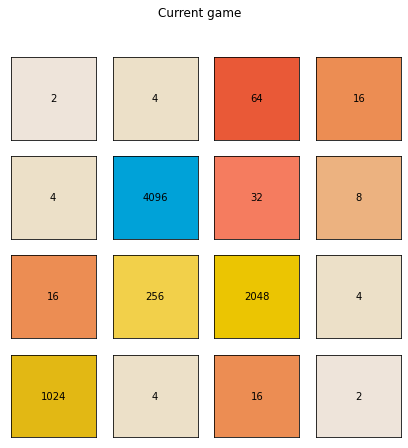

CPU times: user 11min 5s, sys: 22.6 s, total: 11min 28s
Wall time: 11min 12s


In [141]:
%%time
#!rm animations/*.jpg
# up = 1, left = 2, down = 3, right = 4 default is up
env_f=environment_2048_fortran
state=env_f.reset()
#am=env.available_moves(state)
i=0
score=0
moves=True
rep = deque(maxlen=3)
best_possible=True
searches_per_move=400
simulation_lenght =20
while moves:
    i+=1
    am=env.available_moves(state)
    print(am)
    moves_prob=mc_tree_2(env_f, state,searches_per_move,simulation_lenght )
    #print("The average scores at step %s are %s" %(i, moves_prob))
    greedy_move=np.argmax(moves_prob)
    greedy_move+=1
    max_score=np.max(moves_prob)
    print("MC score moves : %s, greedy move = %s" %(moves_prob,greedy_move ))
#     rep.append(state)
#     if np.amax(state)>= 4096 and np.array_equal(rep[0],rep[1]):
#         greedy_move=np.random.choice(am)
    score, state=env.step(state, greedy_move, score)
            
    am=am-1
    moves=not all(am==-1)
    if not moves:
        print("Game finished")
        break

    print("max tile= %s" %(np.amax(state)) )
#     if np.amax(state)>=2048:
#         render_save(state,i)
    #render(state,i)
    print(state)
    clear_output(wait=True)
render(state,i)

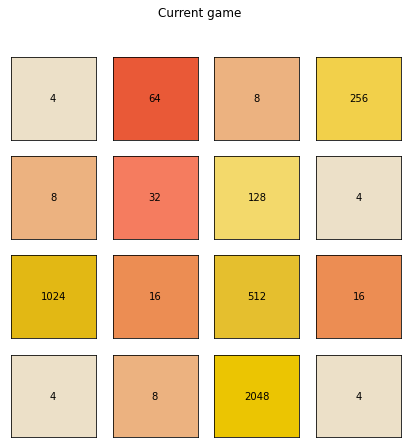

In [87]:
render(state,i)

In [47]:
env.available_moves(state)

array([1, 2, 3, 4], dtype=int32)

In [35]:
env_f=environment_2048_fortran
state=env_f.reset()
print(state)
for i in range(4):
    board=np.copy(state)
    score, state1=env.step(board,i+1 , score)
    print(state1)

[[0 0 0 0]
 [0 2 0 0]
 [0 0 0 0]
 [0 0 0 2]]
[[0 2 0 2]
 [0 0 2 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 2 0 0]
 [2 0 0 0]
 [0 0 0 0]
 [2 0 0 0]]
[[0 0 0 2]
 [0 0 0 0]
 [0 0 0 0]
 [0 2 0 2]]
[[0 0 0 0]
 [0 0 0 2]
 [0 0 2 0]
 [0 0 0 2]]


In [34]:
print(state)

[[0 2 0 0]
 [0 0 0 2]
 [0 0 0 4]
 [0 0 0 4]]


In [4]:
# to run this line, change to ds_portfolio
import os
os.system("ffmpeg -f image2 -r 10  -start_number 953 -i ./animations/frame_%3d.jpg -b:v 5000k -y ./animations/2048.mp4")

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 11.1.0
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1636205452399/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1636205452399/_build_env/bin/pkg-config --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- -

0

### Disecting

In [24]:
%%time
#!rm animations/*.jpg
# up = 1, left = 2, down = 3, right = 4 default is up
env=environment_2048_fortran
state=env.reset()
#am=env.available_moves(state)
i=0
score=0
moves=True
#rep = deque(maxlen=3)
best_possible=True
searches_per_move=500
simulation_lenght =15
while moves:
    i+=1
    am=env.available_moves(state)
    moves_prob=mc_tree_2_prime(env, state,searches_per_move,simulation_lenght )
    #print("The average scores at step %s are %s" %(i, moves_prob))
    greedy_move=np.argmax(moves_prob)
    greedy_move+=1
    max_score=np.max(moves_prob)
        
    score, state=env.step(state, greedy_move, score)
    
    am=am-1
    moves=not all(am==-1)
    if not moves:
        print("Game finished")
        break

    print("max tile= %s" %(np.amax(state)) )
    #render_save(state,i)
    #render(state,i)
    print(state)
    clear_output(wait=True)
print(state)

Game finished
[[   8    4    2    4]
 [   2   32  128    2]
 [  64 4096  256 1024]
 [   2    8   32    2]]
CPU times: user 6min 6s, sys: 22.4 s, total: 6min 28s
Wall time: 6min 11s


### Multiple runs. Looking for the sweet spot for depth and number of trys.

In [23]:
scores_record= defaultdict(lambda: np.zeros(2, dtype=int)) # score:(depth,ntry)
states_record=defaultdict(lambda: np.zeros(2)) # score:(depth,ntry)
def multiple_trys(N):
    #!rm animations/*.jpg
    # up = 1, left = 2, down = 3, right = 4 default is up

    for i in range(N):
        depth =np.random.randint(5,40)
        ntry =np.random.randint(200,600)
        env=environment_2048_fortran
        state=env_f.reset()
        #am=env.available_moves(state)
        i=0
        score=0
        moves=True
        #rep = deque(maxlen=3)
        best_possible=True
        while moves:
            i+=1
            am=env.available_moves(state)
            moves_prob=mc_tree_2(env_f, state,ntry,depth)
            #print("The average scores at step %s are %s" %(i, moves_prob))
            greedy_move=np.argmax(moves_prob)
            greedy_move+=1
            max_score=np.max(moves_prob)

            # It might happend that at some point later in the game, the best move from the tree search 
            # is not possible anymore (not available), so we might need to choose an action randomly 
            if greedy_move in am:
                best_possible=True
            else:
                best_possible=False
            if best_possible:
                greedy_move=greedy_move
            else:
                greedy_move=np.random.choice(am)

            score, state=env.step(state, greedy_move, score)
            am=am-1
            moves=not all(am==-1)
            if not moves:
                print("Game finished")
                break

            print("max tile= %s" %(np.amax(state)) )
            
            #render_save(state,i)
            #render(state,i)
            print(state)
            clear_output(wait=True)
        scores_record[score]=np.array([depth,ntry])
        states_record[(depth,ntry)]=state
        print(state)
    return scores_record